In [1]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from plotnine import *

from scipy import stats

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
# How many samples per country per year
data.groupby(['cntry','year']).count()

idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
cntry year                                                                  
CH    6      773    772      773      770     771    770      770     762   
      7      773    773      773      773     773    773      772     765   
CZ    6      658    653      651      649     654    646      655     644   
      7      658    658      657      658     657    652      655     650   
DE    6       14     14       14       13      13     14       14      14   
      7       14     14       14       14      14     14       14      14   
ES    6     1213   1213     1213     1211    1208   1212     1211    1203   
      7     1213   1212     1211     1199    1209   1212     1211    1185   
NO    6      731    731      730      729     729    727      731     726   
      7      731    731      730      729     728    731      731     731   
SE    6      908    908      906      905     907    907      907     902   
      7      908    907      908      905     906    905      908     904   

            gndr  agea  partner  
cntry year                       
CH    6      773   752      773  
      7      773   751      773  
CZ    6      658   639      656  
      7      648   641      652  
DE    6       14    14       14  
      7       14    14       14  
ES    6     1213  1178     1210  
      7     1213  1182     1210  
NO    6      731   718      729  
      7      731   718      730  
SE    6      908   870      908  
      7      908   878      908

In [4]:
# okay, so we got 6 countries and two years

In [5]:
data.dtypes

cntry       object
idno       float64
year         int64
tvtot      float64
ppltrst    float64
pplfair    float64
pplhlp     float64
happy      float64
sclmeet    float64
sclact     float64
gndr       float64
agea       float64
partner    float64
dtype: object

# Did people become less trusting from 2012 to 2014? 
Compute results for each country in the sample.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 14 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


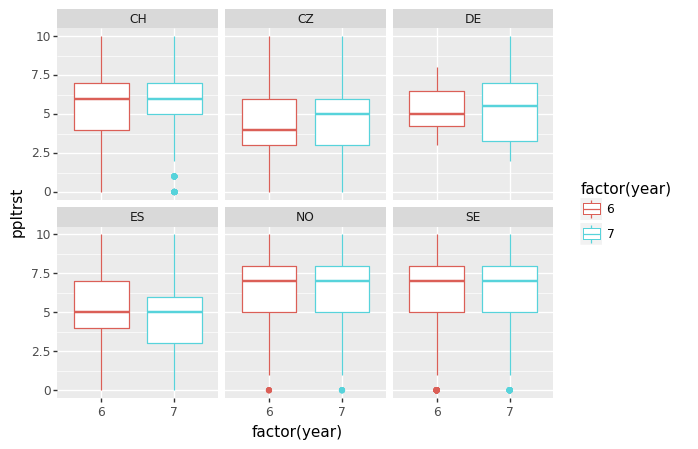

<ggplot: (144567761535)>

In [6]:
# Plot the data split by country and year
(ggplot(data,aes(x='factor(year)', y='ppltrst', color='factor(year)'))
 + geom_boxplot()
 + facet_wrap('~cntry')
)

CH
Shapiro-Wilk Results (0.9537258744239807, 1.050057219047856e-21)
Test for Normality Results NormaltestResult(statistic=65.07864922486084, pvalue=7.385006399082536e-15)


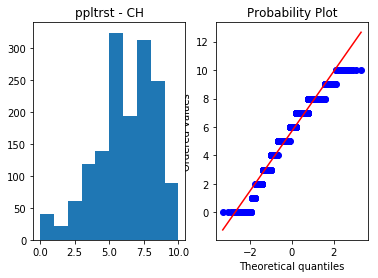

CZ
Shapiro-Wilk Results (0.9720054864883423, 3.1135825763071914e-15)
Test for Normality Results NormaltestResult(statistic=31.081606833612227, pvalue=1.7812087985918503e-07)


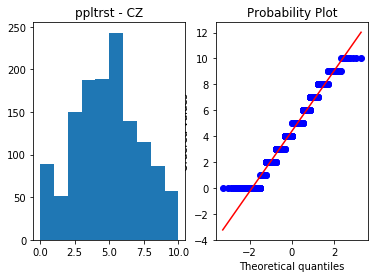

DE
Shapiro-Wilk Results (0.9543156027793884, 0.2538328468799591)
Test for Normality Results NormaltestResult(statistic=0.32189409436526034, pvalue=0.8513371506142537)


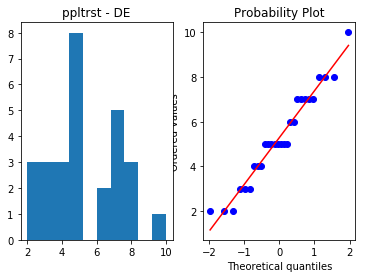

ES
Shapiro-Wilk Results (0.9607914686203003, 4.246828245914725e-25)
Test for Normality Results NormaltestResult(statistic=59.944960087276876, pvalue=9.618720563526143e-14)


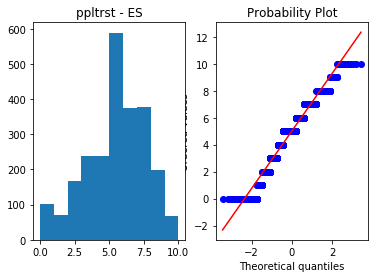

NO
Shapiro-Wilk Results (0.9255931973457336, 2.766007335730931e-26)
Test for Normality Results NormaltestResult(statistic=153.269367095966, pvalue=5.223719070448333e-34)


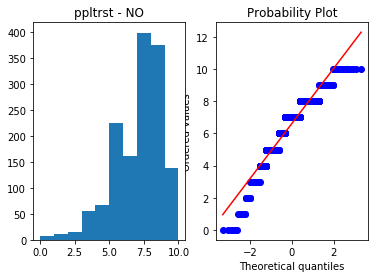

SE
Shapiro-Wilk Results (0.9379505515098572, 7.034201047261831e-27)
Test for Normality Results NormaltestResult(statistic=137.78592642416098, pvalue=1.2027247138223564e-30)


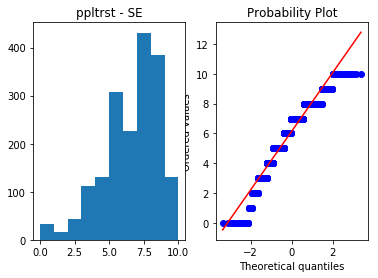

In [7]:
#first lets plot the data and check if it is normally distributed
Countrys= data.cntry.unique()
for C in Countrys:
    print(C)
    
    Cdata=data[data.cntry==C]
    # check shapiro test, close to 1 means normal
    print('Shapiro-Wilk Results',stats.shapiro(Cdata.ppltrst.dropna()))
    print('Test for Normality Results',stats.normaltest(Cdata.ppltrst.dropna()))
    # Make a histogram
    plt.subplot(122)
    res = stats.probplot(Cdata.ppltrst.dropna(), plot=plt)
    # Make a qqplot
    plt.subplot(121)
    plt.hist(Cdata.ppltrst.dropna())
    plt.title('ppltrst'+' - '+C)
    plt.show()
    # Is this normal, let's check a qqplot
    

Most of countries get Shapiro scores above 0.95, so the data seems pretty normal.
I will decide for each test individually, if to use MannWhitneyU or ttest.
Anyway, as the data was not collected from the same people

In [8]:
for C in Countrys:
    Cdata=data[data.cntry==C]
    
    Year1_ppltrst=Cdata.ppltrst[Cdata.year==6].dropna()
    Year2_ppltrst=Cdata.ppltrst[Cdata.year==7].dropna()
    print(C)
    if stats.shapiro(Cdata.ppltrst.dropna())[0]<0.95:
        print('P-value assuming Non-Normality:', stats.mannwhitneyu(Year1_ppltrst,Year2_ppltrst)[1])
    else:
        print('P-value assuming Normality:', stats.ttest_ind(Year1_ppltrst,Year2_ppltrst)[1])   

CH
P-value assuming Normality: 0.49770110247151234
CZ
P-value assuming Normality: 0.6337663626856563
DE
P-value assuming Normality: 0.8578926631223287
ES
P-value assuming Normality: 0.012687599930326627
NO
P-value assuming Non-Normality: 0.3104245504577122
SE
P-value assuming Non-Normality: 0.019728678496597044


We get p-values below 0.5 for ES and SE.<br>
People in ES do people trust significantly less in 2014 than in 2012.<br>
People in SE do people trust significantly more in 2014 than in 2012.

In [9]:
print('ES')
print('Mean 2012:',np.mean(data.ppltrst[(data.year==6)&(data.cntry=='ES')]))
print('Mean 2014:',np.mean(data.ppltrst[(data.year==7)&(data.cntry=='ES')]))
print()
print('SE')
print('Mean 2012:',np.mean(data.ppltrst[(data.year==6)&(data.cntry=='SE')]))
print('Mean 2014:',np.mean(data.ppltrst[(data.year==7)&(data.cntry=='SE')]))

ES
Mean 2012: 5.114591920857379
Mean 2014: 4.895127993393889

SE
Mean 2012: 6.058498896247241
Mean 2014: 6.257709251101321


# Did people become happier from 2012 to 2014? Compute results for each country in the sample.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 31 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


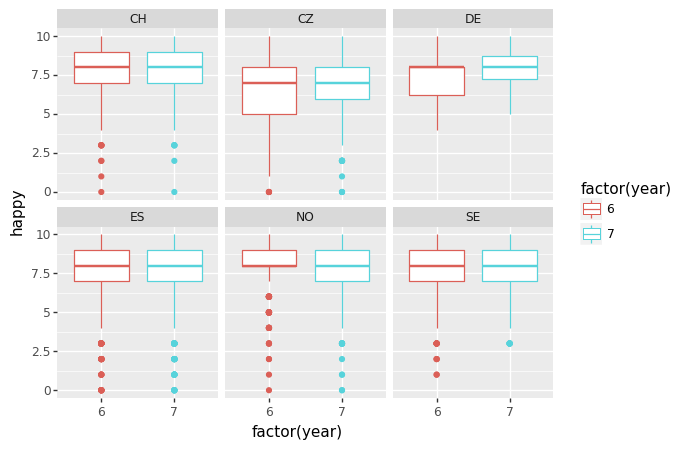

<ggplot: (144570119898)>

In [10]:
# Plot the data split by country and year
(ggplot(data,aes(x='factor(year)', y='happy', color='factor(year)'))
 + geom_boxplot()
 + facet_wrap('~cntry')
)

CH
Shapiro-Wilk Results (0.8845313191413879, 1.989401055733473e-32)


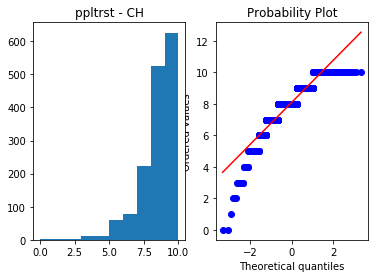

CZ
Shapiro-Wilk Results (0.9456957578659058, 1.9092443292846265e-21)


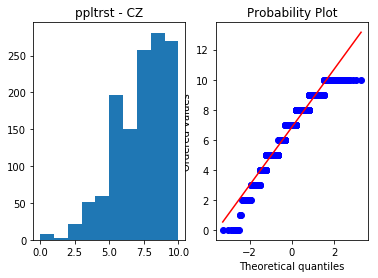

DE
Shapiro-Wilk Results (0.9047739505767822, 0.01482648029923439)


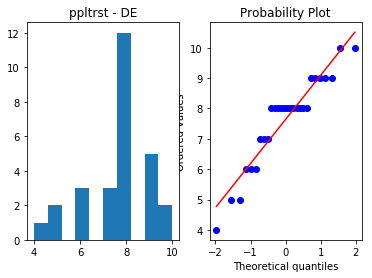

ES
Shapiro-Wilk Results (0.9068908095359802, 3.8589444089819135e-36)


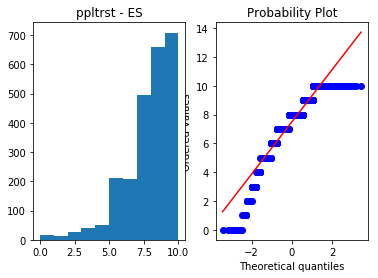

NO
Shapiro-Wilk Results (0.866718053817749, 1.701031610123031e-33)


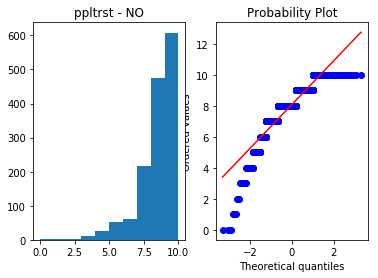

SE
Shapiro-Wilk Results (0.9082769155502319, 1.0497105778125486e-31)


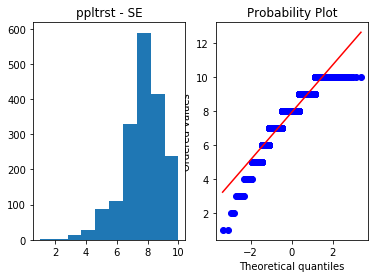

In [11]:
# This does not look normally distributed to me
#first lets plot the data and check if it is normally distributed

for C in Countrys:
    print(C)
    
    Cdata=data[data.cntry==C]
    # check shapiro test, close to 1 means normal, p-value <0.05 means that the data are not normally
    print('Shapiro-Wilk Results',stats.shapiro(Cdata.happy.dropna()))
    # Make a histogram
    plt.subplot(122)
    res = stats.probplot(Cdata.happy.dropna(), plot=plt)
    # Make a qqplot
    plt.subplot(121)
    plt.hist(Cdata.happy.dropna())
    plt.title('ppltrst'+' - '+C)
    plt.show()
   
    

In [12]:
# The majority of the data does not look normal
# Let's use a non-parametric test when the Shapiro p-value <0.05
for C in Countrys:
    Cdata=data[data.cntry==C]
    
    Year1=Cdata.happy[Cdata.year==6].dropna()
    Year2=Cdata.happy[Cdata.year==7].dropna()
    print(C)
    if (stats.shapiro(Cdata.happy.dropna())[1])<0.05:
        print('P-value Assuming Non-Normality:', round(stats.mannwhitneyu(Year1,Year2)[1],6))        
    else:
        print('P-value assuming Normality:', round(stats.ttest_ind(Year1,Year2)[1],6))

CH
P-value Assuming Non-Normality: 0.318282
CZ
P-value Assuming Non-Normality: 0.116238
DE
P-value Assuming Non-Normality: 0.273948
ES
P-value Assuming Non-Normality: 0.021581
NO
P-value Assuming Non-Normality: 6e-06
SE
P-value Assuming Non-Normality: 0.411153


There are significant differences in ES and NO. 

In [13]:
print('ES')
print('Median 2012:',np.median(data.happy[(data.year==6)&(data.cntry=='ES')].dropna()))
print('Median 2014:',np.median(data.happy[(data.year==7)&(data.cntry=='ES')].dropna()))
print('Mean 2012:',np.mean(data.happy[(data.year==6)&(data.cntry=='ES')].dropna()))
print('Mean 2014:',np.mean(data.happy[(data.year==7)&(data.cntry=='ES')].dropna()))
print()
print('NO')
print('Mean 2012:',np.median(data.happy[(data.year==6)&(data.cntry=='NO')].dropna()))
print('Mean 2014:',np.median(data.happy[(data.year==7)&(data.cntry=='NO')].dropna()))
print('Mean 2012:',np.mean(data.happy[(data.year==6)&(data.cntry=='NO')].dropna()))
print('Mean 2014:',np.mean(data.happy[(data.year==7)&(data.cntry=='NO')].dropna()))

ES
Median 2012: 8.0
Median 2014: 8.0
Mean 2012: 7.548679867986799
Mean 2014: 7.41996699669967

NO
Mean 2012: 8.0
Mean 2014: 8.0
Mean 2012: 8.25171939477304
Mean 2014: 7.9151846785225715



# Who reported watching more TV in 2012, men or women?

In [14]:
# Get data
Y12_tvtot=data[['gndr','tvtot']][data.year==6].dropna()

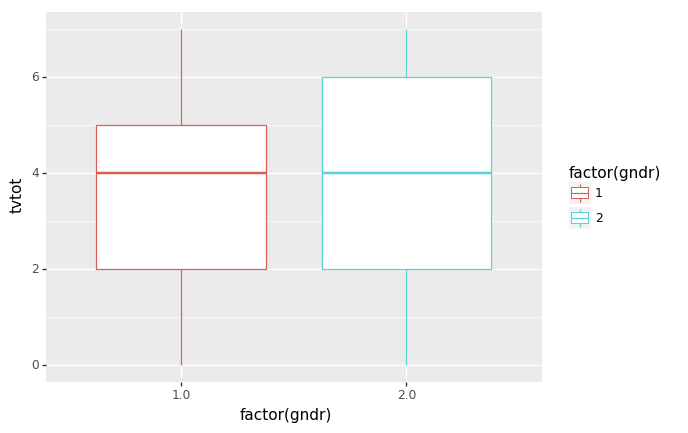

<ggplot: (-9223371892283192327)>

In [15]:
# Plot the data split by country and year
(ggplot(Y12_tvtot,aes(x='factor(gndr)', y='tvtot', color='factor(gndr)'))
 + geom_boxplot()
)

Shapiro-Wilk Results (0.9415122270584106, 3.2778313280229025e-38)


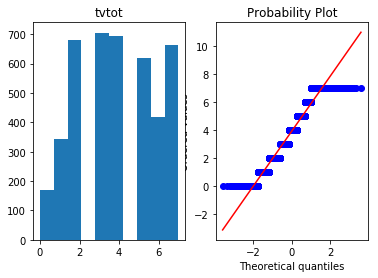

In [16]:
# Test if the data is normal
print('Shapiro-Wilk Results',stats.shapiro(Y12_tvtot.tvtot))
# Make a histogram
plt.subplot(122)
res = stats.probplot(Y12_tvtot.tvtot, plot=plt)
# Make a qqplot
plt.subplot(121)
plt.hist(Y12_tvtot.tvtot)
plt.title('tvtot')
plt.show()

In [17]:
#The qqplot and the tests indicate that the distribution of tvtot is not normal
# The data groups are indepent
# Let's use some non-parametric test for independent groups

In [18]:
male=Y12_tvtot.tvtot[Y12_tvtot.gndr==1]
female=Y12_tvtot.tvtot[Y12_tvtot.gndr==2]
print('P-value assuming normal distribution',stats.ttest_ind(male,female))
print('P-value assuming non-normal distribution',stats.mannwhitneyu(male,female))
print('P-value assuming non-normal distribution',stats.median_test(male,female))
print('P-value assuming non-normal distribution',stats.kruskal(male,female))

P-value assuming normal distribution Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.4902360402696986)
P-value assuming non-normal distribution MannwhitneyuResult(statistic=2271081.5, pvalue=0.22382598497660156)
P-value assuming non-normal distribution (0.10448797978115422, 0.7465089423999145, 4.0, array([[ 846,  853],
       [1305, 1287]], dtype=int64))
P-value assuming non-normal distribution KruskalResult(statistic=0.5766091020549451, pvalue=0.447644522500795)


There is no significant difference between the amount of TV watched by men and women.
# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

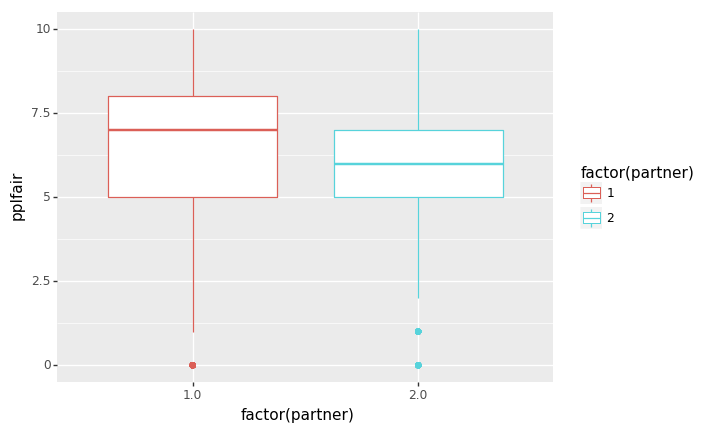

<ggplot: (-9223371892283002536)>

In [19]:
# drop all people who did not answer the partner question
Y2012data=data[['partner','pplfair']][data.year==6].dropna()

# Plot the data split by country and year
(ggplot(Y2012data,aes(x='factor(partner)', y='pplfair', color='factor(partner)'))
 + geom_boxplot()
)

Shapiro-Wilk Results (0.9475398063659668, 1.4641028229922702e-36)


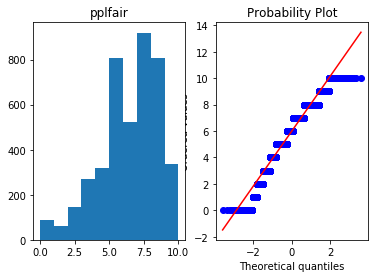

In [20]:
# Test if the data is normal
print('Shapiro-Wilk Results',stats.shapiro(Y2012data.pplfair))
# Make a histogram
plt.subplot(122)
res = stats.probplot(Y2012data.pplfair, plot=plt)
# Make a qqplot
plt.subplot(121)
plt.hist(Y2012data.pplfair)
plt.title('pplfair')
plt.show()

In [23]:
# ShapiroWilk indicates pplfair is not normally distributed
# we should use non-parametric test assuming independence between the samples

Partner=Y2012data.pplfair[Y2012data.partner==1]
Alone=Y2012data.pplfair[Y2012data.partner==2]
print('P-value assuming non-normal distribution',stats.mannwhitneyu(Partner,Alone))

P-value assuming non-normal distribution MannwhitneyuResult(statistic=1998233.5, pvalue=0.00010499272215466025)


People living alone, do have a significantly lower assumption that people are fair, than people living with a partner.

# Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

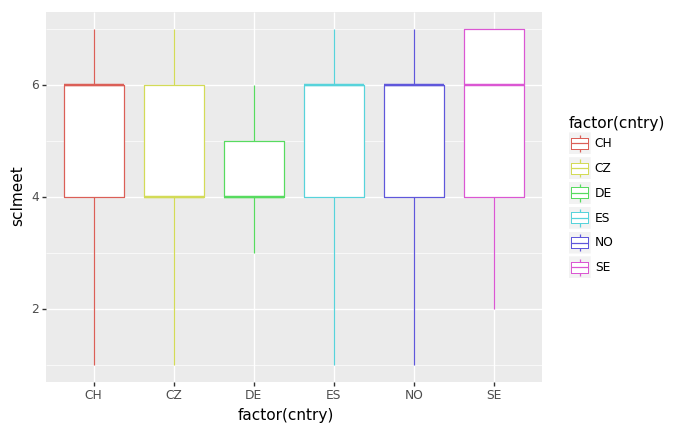

<ggplot: (-9223371892283399750)>

In [24]:
Y14= data[['cntry','sclmeet']][data.year==7].dropna()

# Plot the data split by country and year
(ggplot(Y14,aes(x='factor(cntry)', y='sclmeet', color='factor(cntry)'))
 + geom_boxplot()
)

Shapiro-Wilk Results (0.9057683348655701, 1.401298464324817e-45)


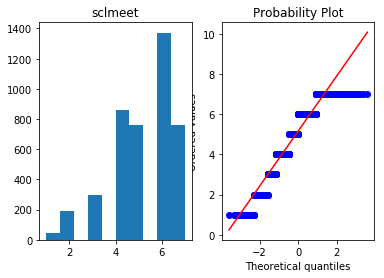

In [25]:
# Test if the data is normal
print('Shapiro-Wilk Results',stats.shapiro(Y14.sclmeet))
# Make a histogram
plt.subplot(122)
res = stats.probplot(Y14.sclmeet, plot=plt)
# Make a qqplot
plt.subplot(121)
plt.hist(Y14.sclmeet)
plt.title('sclmeet')
plt.show()

In [26]:
# Data is clearly not normally distributed => non-parametric test
# we have independent data from more than two different countries => Median or KruskalWallis test
CH_meet=Y14.sclmeet[Y14.cntry=='CH']
CZ_meet=Y14.sclmeet[Y14.cntry=='CZ']
DE_meet=Y14.sclmeet[Y14.cntry=='DE']
ES_meet=Y14.sclmeet[Y14.cntry=='ES']
NO_meet=Y14.sclmeet[Y14.cntry=='NO']
SE_meet=Y14.sclmeet[Y14.cntry=='SE']

scl_meet_cntry=[CH_meet,CZ_meet,DE_meet,ES_meet,NO_meet,SE_meet]

print('P-value assuming non-normal distribution\n',stats.median_test(CH_meet, CZ_meet,DE_meet,ES_meet,NO_meet,SE_meet)[0:3])
print(stats.median_test(CH_meet, CZ_meet,DE_meet,ES_meet,NO_meet,SE_meet)[3])
print('P-value assuming non-normal distribution',stats.kruskal(CH_meet, CZ_meet,DE_meet,ES_meet,NO_meet,SE_meet))

P-value assuming non-normal distribution
 (183.78157411581103, 8.330667761845056e-38, 5.0)
[[391 177   1 629 408 527]
 [381 478  13 582 323 381]]
P-value assuming non-normal distribution KruskalResult(statistic=213.26953465901386, pvalue=4.10596883833812e-44)


According to the Median_test, CZ and DE have the majority of data points below the grand median (5.0). Indicating that people there meet significantly less.
This is supproted by the Kruskal-Walis p-value.
# Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [39]:
df6= data[['cntry','agea','sclact','year']].dropna()
df6.head()

,cntry,agea,sclact,year
0,CH,60.0,4.0,6
1,CH,59.0,2.0,6
2,CH,24.0,3.0,6
3,CH,64.0,2.0,6
4,CH,55.0,2.0,6


In [40]:
# define 3 age groups
def AgeCat(c):
    if c['agea'] <= 30:
        return 'young'
    elif (c['agea'] > 30) &(c['agea']<=60):
        return 'middle'
    elif c['agea']>60:
        return 'old'
    else:
        return 'Undefined'

df6['acat']=df6.apply(AgeCat, axis=1)
df6.head()

,cntry,agea,sclact,year,acat
0,CH,60.0,4.0,6,middle
1,CH,59.0,2.0,6,middle
2,CH,24.0,3.0,6,young
3,CH,64.0,2.0,6,old
4,CH,55.0,2.0,6,middle


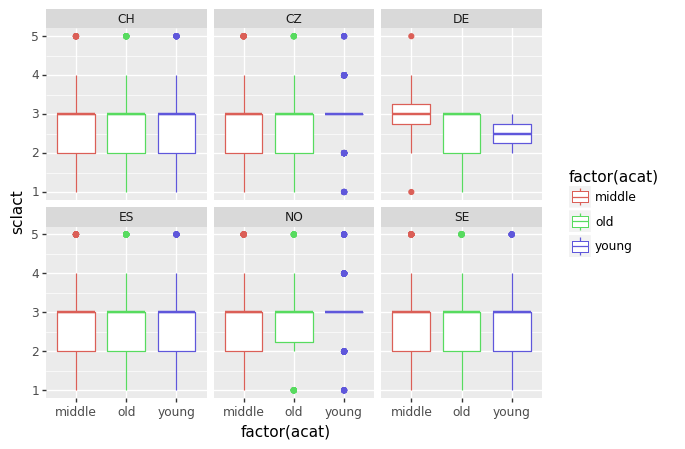

<ggplot: (-9223371892284705697)>

In [41]:
# Plot the data split by country and year
(ggplot(df6,aes(x='factor(acat)', y='sclact', color='factor(acat)'))
 + geom_boxplot()
 + facet_wrap('~cntry')
)

In [42]:
# Let's further investigate CZ, DE and NO, there seem to be diffrences for the different age groups
CZ_df=df6[df6.cntry=='CZ']
DE_df=df6[df6.cntry=='DE']
NO_df=df6[df6.cntry=='NO']

## CZ

In [46]:
def CheckNormality(data,title):
    # Test if the data is normal
    print('Shapiro-Wilk Results',stats.shapiro(data))
    # Make a histogram
    plt.subplot(122)
    res = stats.probplot(data, plot=plt)
    # Make a qqplot
    plt.subplot(121)
    plt.hist(data)
    plt.title(title)
    plt.show()

Shapiro-Wilk Results (0.8617985248565674, 6.207340742080714e-32)


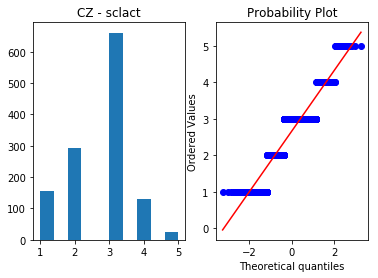

In [48]:
CheckNormality(CZ_df.sclact,'CZ - sclact')

In [54]:
# The CZ data is not normally distributed
young=CZ_df.sclact[CZ_df.acat=='young']
middle=CZ_df.sclact[CZ_df.acat=='middle']
old=CZ_df.sclact[CZ_df.acat=='old']
print('P-value assuming non-normal distribution\n',stats.median_test(young,middle,old)[0:3])
print(stats.median_test(young,middle,old)[3])

P-value assuming non-normal distribution
 (20.89888886076858, 2.896436054766301e-05, 3.0)
[[ 49  65  41]
 [207 668 234]]


CZ - paired Mann Whitney U tests
young versus middle MannwhitneyuResult(statistic=111572.5, pvalue=0.006465689493087853)
young versus old MannwhitneyuResult(statistic=56915.5, pvalue=0.4252731545426485)
middle versus old MannwhitneyuResult(statistic=123382.5, pvalue=0.013860582143667546)


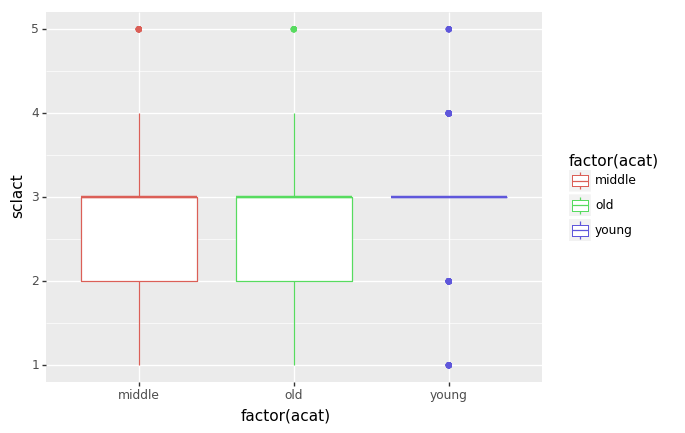

<ggplot: (-9223371892282803845)>

In [59]:
print('CZ - paired Mann Whitney U tests')
print('young versus middle',stats.mannwhitneyu(young,middle))
print('young versus old',stats.mannwhitneyu(young,old))
print('middle versus old',stats.mannwhitneyu(middle,old))

# Plot the data split by country and year
(ggplot(CZ_df,aes(x='factor(acat)', y='sclact', color='factor(acat)'))
 + geom_boxplot()
)

CZ significant differences between young and middle and young and old.
## DE

Shapiro-Wilk Results (0.8740215301513672, 0.002971766283735633)


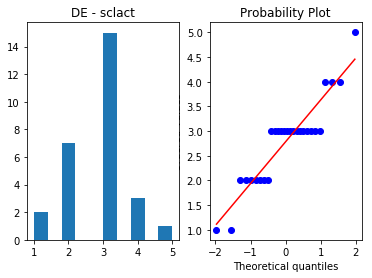

P-value assuming non-normal distribution
 (3.4999999999999996, 0.17377394345044514, 3.0)
[[ 0  4  0]
 [ 2 12 10]]

DE - paired Mann Whitney U tests
young versus middle MannwhitneyuResult(statistic=10.5, pvalue=0.2246128473506931)
young versus old MannwhitneyuResult(statistic=9.5, pvalue=0.5)
middle versus old MannwhitneyuResult(statistic=56.0, pvalue=0.08709463735482387)


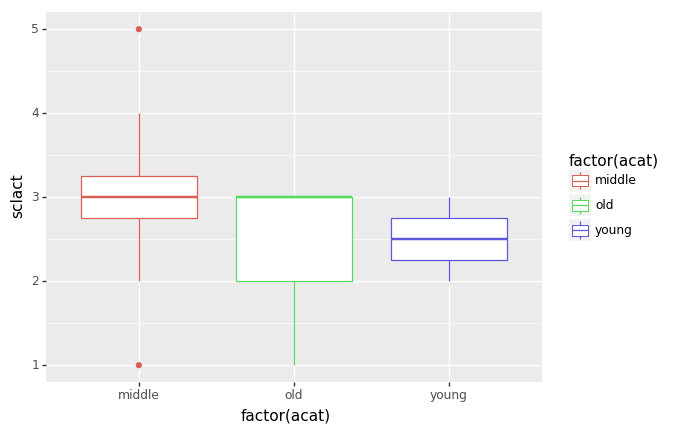

<ggplot: (-9223371892283236394)>

In [60]:
CheckNormality(DE_df.sclact,'DE - sclact')
# The DE data is not normally distributed
young=DE_df.sclact[DE_df.acat=='young']
middle=DE_df.sclact[DE_df.acat=='middle']
old=DE_df.sclact[DE_df.acat=='old']
print('P-value assuming non-normal distribution\n',stats.median_test(young,middle,old)[0:3])
print(stats.median_test(young,middle,old)[3])
print()
print('DE - paired Mann Whitney U tests')
print('young versus middle',stats.mannwhitneyu(young,middle))
print('young versus old',stats.mannwhitneyu(young,old))
print('middle versus old',stats.mannwhitneyu(middle,old))
# Plot the data split by country and year
(ggplot(DE_df,aes(x='factor(acat)', y='sclact', color='factor(acat)'))
 + geom_boxplot()
)

No, significant difference in DE.
## NO

Shapiro-Wilk Results (0.8547781705856323, 2.3109312061641612e-34)


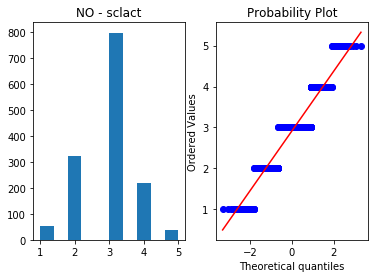

P-value assuming non-normal distribution
 (7.55094139694536, 0.022926296728934512, 3.0)
[[ 60 119  80]
 [264 634 274]]

NO - paired Mann Whitney U tests
young versus middle MannwhitneyuResult(statistic=111572.5, pvalue=0.006465689493087853)
young versus old MannwhitneyuResult(statistic=56915.5, pvalue=0.4252731545426485)
middle versus old MannwhitneyuResult(statistic=123382.5, pvalue=0.013860582143667546)


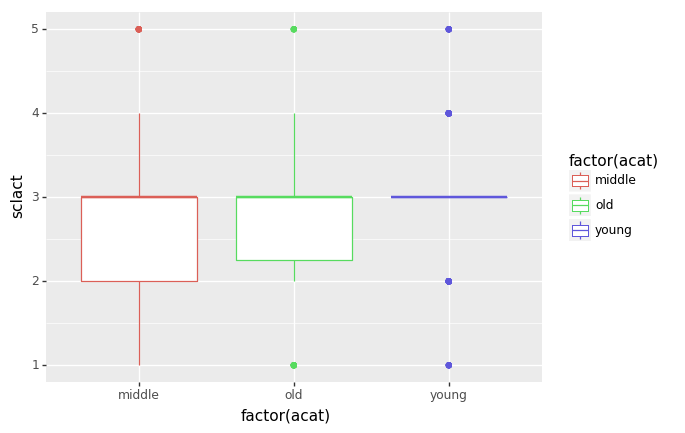

<ggplot: (144571401213)>

In [61]:
CheckNormality(NO_df.sclact,'NO - sclact')
# The DE data is not normally distributed
young=NO_df.sclact[NO_df.acat=='young']
middle=NO_df.sclact[NO_df.acat=='middle']
old=NO_df.sclact[NO_df.acat=='old']
print('P-value assuming non-normal distribution\n',stats.median_test(young,middle,old)[0:3])
print(stats.median_test(young,middle,old)[3])
print()
print('NO - paired Mann Whitney U tests')
print('young versus middle',stats.mannwhitneyu(young,middle))
print('young versus old',stats.mannwhitneyu(young,old))
print('middle versus old',stats.mannwhitneyu(middle,old))

# Plot the data split by country and year
(ggplot(NO_df,aes(x='factor(acat)', y='sclact', color='factor(acat)'))
 + geom_boxplot()
)

Significant differences between young and middle and middle and old.